# Carga Librerias

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# prueba 

#Carga de DATOS desde kaggle

In [ ]:
api_token={"username":"luisfhidalgo",
           "key":"d4e4e6425d85ef204447086541cb5b11"}

In [ ]:
!rm -rf /roo/.kaggle. # Elimina de forma recursiva y forzada un directorio y su contenido.Por si existe

In [ ]:
!mkdir  /root/.kaggle # Crea Directorio

In [ ]:
#Ese código guarda un token de API (almacenado en la variable api_token) en un archivo JSON llamado kaggle.
#json dentro del directorio .kaggle del usuario (usualmente /root/.kaggle).
# Este archivo se usa para autenticarte en Kaggle desde entornos de programación.
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
#!kaggle datasets list

In [ ]:
#En resumen, hace que el archivo kaggle.json (que contiene tu token de API) sea accesible solo para el usuario root,
# lo cual es una práctica de seguridad recomendada para proteger información sensible como tokens de API.
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#Ese comando usa la herramienta de línea de comandos kaggle para descargar el dataset identificado como hernan4444/animeplanet-recommendation-database-2020.
!kaggle datasets download -d zynicide/wine-reviews

## Se listan los archivos que contiene el Zip de Kaggle

In [ ]:
archivo_zip = 'wine-reviews.zip'

# Listar los archivos dentro del ZIP
with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
    archivos = zip_file.namelist()
    print("Archivos en el ZIP:")
    for archivo in archivos:
        print(archivo)

# Se carga el Archivo Dataset al dataframe que voy a utilizar

In [ ]:
#Cargo los Archivos Dataset a los dataframe que voy a utilizar
import zipfile
import pandas as pd

archivo_zip = 'wine-reviews.zip'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:

        with zip_file.open('winemag-data_first150k.csv') as winemag_150_csv:
          winemag_df = pd.read_csv(winemag_150_csv)


In [ ]:
winemag_df.shape

In [ ]:
winemag_df.info()

In [ ]:
winemag_df.head(2)

## Transformancion de los datos:

In [ ]:
duplicados = winemag_df.duplicated().sum()
print("Cantidad de duplicados:",duplicados) # son registros exactamente iguales
# Busca registros que contengan la frase
registros_coincidentes = winemag_df[winemag_df['description'].str.contains("This standout Rocks District wine brings earth")]
# Imprime los registros coincidentes
print(registros_coincidentes)

In [ ]:
winemag_df.drop_duplicates(inplace=True)

In [ ]:
# Se elimina columna  'Unnamed: 0',
winemag_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
winemag_df.isnull().sum()

In [ ]:
# Se completan valores nulos en 'designation' y 'region_1'
winemag_df.loc[:, 'designation'] = winemag_df['designation'].fillna('Unknown')
winemag_df.loc[:, 'region_1'] = winemag_df['region_1'].fillna('Unknown')
winemag_df.loc[:, 'region_2'] = winemag_df['region_2'].fillna('Unknown')

In [ ]:
# Imputación con la mediana en el campo 'price'
mediana_precio = winemag_df['price'].median()
winemag_df['price'] = winemag_df['price'].fillna(mediana_precio)

In [ ]:
# Se elimina  las 5 filas con valores nulos en la columna 'country'
winemag_df.dropna(subset=['country'], inplace=True)


In [ ]:
df_NPL = winemag_df.copy()

In [ ]:
import pandas as pd
import numpy as np
import spacy
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
# Cargar el modelo de lenguaje de spaCy
nlp = spacy.load("en_core_web_sm")

# Cargar el dataset

print(df_NPL.head())

Limpieza de datos

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Tokenización y limpieza con spaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return " ".join(tokens)

# Aplicar la función de preprocesamiento a la columna de reseñas
df_NPL["cleaned_review"] = df_NPL["description"].apply(preprocess_text)
print(df_NPL["cleaned_review"].head())

0    tremendous varietal wine hail oakville age yea...
1    ripe aroma fig blackberry cassis soften sweete...
2    mac watson honor memory wine mother tremendous...
3    spend month new french oak incorporate fruit p...
4    wine la bégude name high point vineyard foot s...
Name: cleaned_review, dtype: object


Análisis de frecuencia de palabras

In [ ]:
# Dividir el datasetPaso 4: Análisis de sentimiento con TextBlob
# TextBlob nos permite calcular la polaridad del sentimiento de una reseña. en reseñas bien y mal puntuadas
good_reviews = df_NPL[df_NPL["points"] > 90]["cleaned_review"]
neutral_reviews = df_NPL[(df_NPL["points"] > 85) & (df_NPL["points"] < 90)]["cleaned_review"]
bad_reviews = df_NPL[df_NPL["points"] < 85]["cleaned_review"]

# Función para obtener las palabras más comunes
from collections import Counter

def get_most_common_words(reviews, num_words=20):
    all_words = " ".join(reviews).split()
    return Counter(all_words).most_common(num_words)

# Palabras más comunes en reseñas bien puntuadas
common_good = get_most_common_words(good_reviews)
print("Palabras comunes en reseñas bien puntuadas:", common_good)

# Palabras más comunes en reseñas bien puntuadas
common_neutral = get_most_common_words(neutral_reviews)
print("Palabras comunes en reseñas bien puntuadas:", common_neutral )

# Palabras más comunes en reseñas mal puntuadas
common_bad = get_most_common_words(bad_reviews)
print("Palabras comunes en reseñas mal puntuadas:", common_bad)

Palabras comunes en reseñas bien puntuadas: [('wine', 25859), ('fruit', 18442), ('flavor', 16427), ('tannin', 10314), ('cherry', 9219), ('black', 8613), ('rich', 8368), ('finish', 8105), ('ripe', 7893), ('spice', 7782), ('acidity', 7597), ('year', 7527), ('drink', 6832), ('dry', 6777), ('show', 5739), ('blackberry', 5640), ('oak', 5402), ('palate', 5301), ('note', 5030), ('aroma', 4967)]
Palabras comunes en reseñas bien puntuadas: [('wine', 40405), ('flavor', 38148), ('fruit', 33058), ('finish', 21425), ('cherry', 17959), ('acidity', 15059), ('dry', 14884), ('aroma', 14318), ('tannin', 14269), ('palate', 13772), ('ripe', 12410), ('spice', 12310), ('drink', 12142), ('note', 12029), ('black', 11569), ('good', 10900), ('berry', 10503), ('fresh', 10263), ('red', 10210), ('oak', 9461)]
Palabras comunes en reseñas mal puntuadas: [('flavor', 15580), ('wine', 11058), ('fruit', 7795), ('finish', 7085), ('cherry', 5903), ('sweet', 5231), ('palate', 4937), ('dry', 4569), ('aroma', 4499), ('acidit

Análisis de sentimiento con TextBlob
TextBlob nos permite calcular la polaridad del sentimiento de una reseña.

In [ ]:
# Función para obtener la polaridad del sentimiento
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Aplicar la función a las reseñas limpias
df_NPL["sentiment"] = df_NPL["cleaned_review"].apply(get_sentiment)   # con las reseñas limpias y la pone en setiment

# Clasificar reseñas como positivas o negativas
df_NPL["sentiment_label"] = df_NPL["sentiment"].apply(lambda x: "Positive" if x > 0 else "Negative")
print(df_NPL[["description", "sentiment", "sentiment_label"]].head())

                                         description  sentiment  \
0  This tremendous 100% varietal wine hails from ...   0.264583   
1  Ripe aromas of fig, blackberry and cassis are ...   0.327083   
2  Mac Watson honors the memory of a wine once ma...   0.137500   
3  This spent 20 months in 30% new French oak, an...   0.139394   
4  This is the top wine from La Bégude, named aft...   0.140000   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  


Paso 5: Visualización de resultados

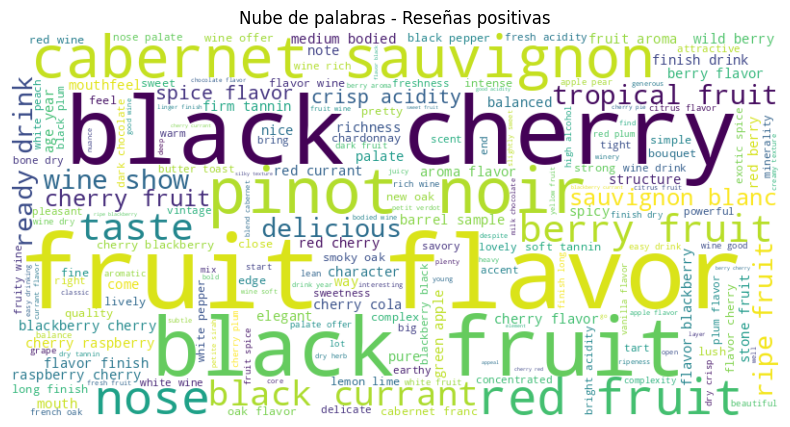

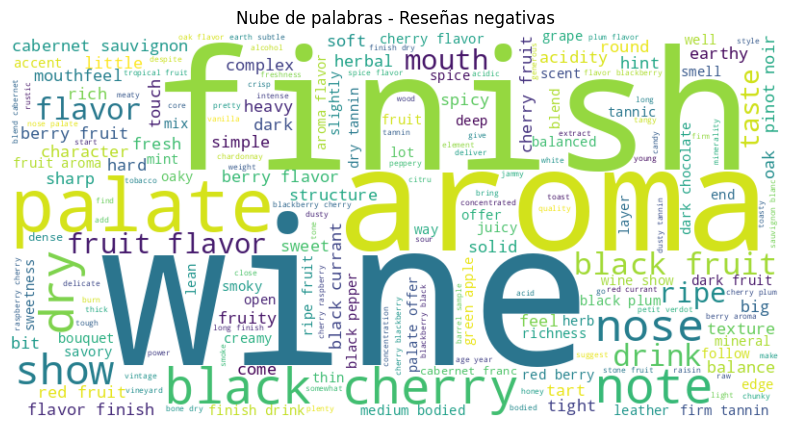

In [ ]:
# Nube de palabras para reseñas positivas
positive_words = " ".join(df_NPL[df_NPL["sentiment_label"] == "Positive"]["cleaned_review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras - Reseñas positivas")
plt.show()

# Nube de palabras para reseñas negativas
negative_words = " ".join(df_NPL[df_NPL["sentiment_label"] == "Negative"]["cleaned_review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras - Reseñas negativas")
plt.show()

Gráfico de barras para palabras más comunes

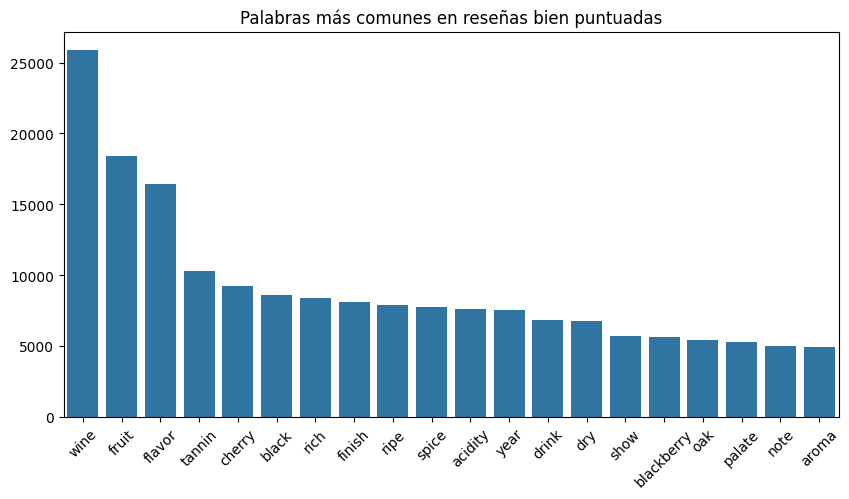

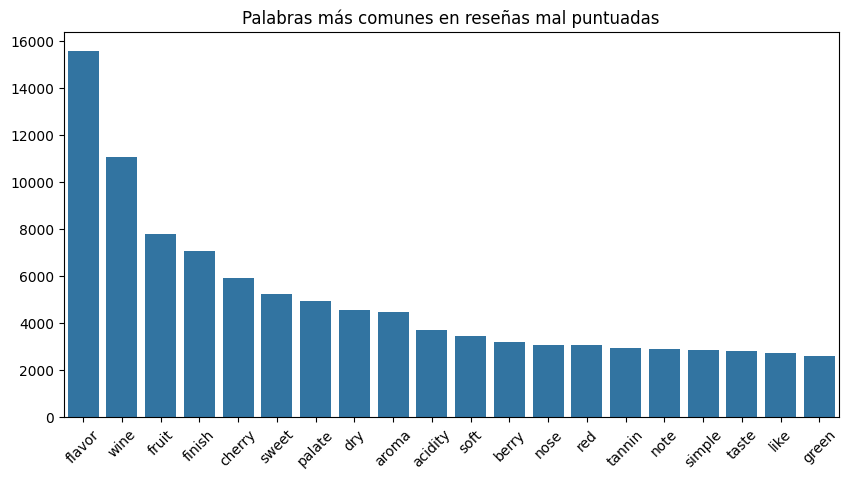

In [ ]:
# Gráfico de barras para palabras comunes en reseñas bien puntuadas
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_good], y=[word[1] for word in common_good])
plt.title("Palabras más comunes en reseñas bien puntuadas")
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para palabras comunes en reseñas mal puntuadas
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_bad], y=[word[1] for word in common_bad])
plt.title("Palabras más comunes en reseñas mal puntuadas")
plt.xticks(rotation=45)
plt.show()

# Modelo NLP: Análisis de Sentimiento en Reseñas

## **1. Preprocesamiento y Limpieza del Texto**
- Eliminación de **stopwords** y **lemmatización** con spaCy.
- Creación de la columna `cleaned_review` con reseñas normalizadas.
- **Nota:** Mejora la precisión del análisis de sentimientos.

---

## **2. Análisis de Frecuencia de Palabras**
| Tipo de Reseña | Palabras Más Frecuentes | Interpretación |
|---------------|----------------------|----------------|
| **Bien puntuadas (>90)** | wine, fruit, flavor, tannin, cherry | Relacionadas con sabores intensos y equilibrados. |
| **Mal puntuadas (<85)** | flavor, sweet, dry, acidity | Indican desequilibrios en el sabor. |
- **Nota:** Los términos usados reflejan directamente la percepción de calidad.

---


Reseñas bien puntuadas vs. reseñas mal puntuadas

Las palabras más comunes son: "wine", "fruit", "flavor", "tannin", "cherry", "black", "rich", "finish", "ripe", "spice".

Estas palabras sugieren que los vinos bien puntuados tienden a ser descritos con términos relacionados con sabores intensos, complejidad y cualidades positivas como "rico" o "maduro".

Los descriptores como "cherry" (cereza) y "black" (negro) indican que los vinos con notas frutales y profundidad en el sabor son bien recibidos.


Reseñas mal puntuadas (puntuación < 85):

Las palabras más comunes son: "flavor", "wine", "fruit", "finish", "cherry", "sweet", "palate", "dry", "aroma", "acidity".

Aunque algunas palabras coinciden con las reseñas positivas (como "flavor" y "fruit"), el contexto es diferente. Por ejemplo, "sweet" (dulce) y "dry" (seco) pueden indicar que los sabores no están equilibrados o no cumplen con las expectativas.

La presencia de palabras como "simple" y "green" (verde) sugiere que los vinos mal puntuados son percibidos como poco complejos o inmaduros.